In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.dates as mdates

%matplotlib notebook

## 1. About the data 🚀

Data obtained from Kaggle, an open comunity about Data Science and Machine Learning. The dataset can be obtained clicking [here](https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil). It contains information about the purchase and sale of fuels in Brazil, from 2004 to 2019.

**NOTICE**: The data and analyzes were obtained for the purpose of studying data science, that is, there are considerable chances of being inaccurate or incorrect. If you have any suggestions for correction or improvement, leave an issue or pull request :)

Initial questions:
- Variation in commom gasoline price in Rio Grande do Sul;
- Mean price for each type of fuel in the first semester of 2019 in each brazilian state;
- Verify if truckers strike, in 2018, impacted fuel prices;

In [2]:
df = pd.read_csv('datasets/2004-2019.tsv', sep='\t', index_col=0)
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## 2. Data Cleansing 🚿

The dataset presented few correction needs. A good start point is the verification of the present data types in each dataset column.

In [3]:
df.dtypes

DATA INICIAL                      object
DATA FINAL                        object
REGIÃO                            object
ESTADO                            object
PRODUTO                           object
NÚMERO DE POSTOS PESQUISADOS       int64
UNIDADE DE MEDIDA                 object
PREÇO MÉDIO REVENDA              float64
DESVIO PADRÃO REVENDA            float64
PREÇO MÍNIMO REVENDA             float64
PREÇO MÁXIMO REVENDA             float64
MARGEM MÉDIA REVENDA              object
COEF DE VARIAÇÃO REVENDA         float64
PREÇO MÉDIO DISTRIBUIÇÃO          object
DESVIO PADRÃO DISTRIBUIÇÃO        object
PREÇO MÍNIMO DISTRIBUIÇÃO         object
PREÇO MÁXIMO DISTRIBUIÇÃO         object
COEF DE VARIAÇÃO DISTRIBUIÇÃO     object
MÊS                                int64
ANO                                int64
dtype: object

The numerical columns are properly with int or float format, however, the date fields are in string format (object, in Pandas). So, we need to convert such fields into datetime format and remove some unused columns.

In [4]:
# dropping unused columns
df.drop(['NÚMERO DE POSTOS PESQUISADOS', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', \
        'COEF DE VARIAÇÃO REVENDA'], axis=1, inplace=True)

# formatting date values to datetime format
for column in df.columns[0:2]:
    df[column] = pd.to_datetime(df[column])

## 3. Análise dos Dados 🔎

With the dataset clean and free of inconsistencies, we can obtain significant data from it. First, we'll attempt to answer our first question "Variation in commom gasoline price in Rio Grande do Sul". To do it, we'll start splitting from the original dataframe only the rows which are ESTADO (state) = Rio Grande do Sul and PRODUTO (product) = Gasolina Comum. To our interests, we'll exclude 2004 and 2019 years, because your data is incomplete.

In [5]:
gas_rs = df[(df['ESTADO'] == 'RIO GRANDE DO SUL') & (df['PRODUTO'] == 'GASOLINA COMUM')]
gas_rs = gas_rs.sort_values(by='DATA INICIAL')
gas_rs = gas_rs[(gas_rs['ANO'] != 2004) & (gas_rs['ANO'] != 2019)]
gas_rs.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,MÊS,ANO
13007,2005-01-02,2005-01-08,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.469,0.074,2.300,2.74,0.379,2.09,0.052,1.969,2.414,1,2005
13034,2005-01-09,2005-01-15,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.466,0.075,2.280,2.74,0.375,2.091,0.049,1.969,2.414,1,2005
13061,2005-01-16,2005-01-22,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.464,0.076,2.249,2.74,0.377,2.087,0.051,1.95,2.421,1,2005
13088,2005-01-23,2005-01-29,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.461,0.076,2.310,2.74,0.374,2.087,0.049,1.965,2.4221,1,2005
13115,2005-01-30,2005-02-05,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.460,0.076,2.310,2.74,0.375,2.085,0.053,1.947,2.4221,1,2005


Next, we can group our data by year (ANO) and month (MÊS). We'll do it with mean as our aggregate function. This way, we'll got an dataframe showing average resale price, for each month and year.

In [6]:
gas_rs = gas_rs.groupby(['ANO', 'MÊS']) \
               .agg(np.mean) \
               .drop(columns=['PREÇO MÁXIMO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA'])
gas_rs.head(12)

PREÇO MÉDIO REVENDA
ANO  MÊS                     
2005 1                2.46400
     2                2.44275
     3                2.40025
     4                2.57650
     5                2.51020
     6                2.53075
     7                2.54400
     8                2.52400
     9                2.69075
     10               2.75540
     11               2.71625
     12               2.72725

## 4. Data Visualization

Very well, our data is ready to be plotted. We'll create an interactive plot, to enable the viewer to change the year and, consequently, the plot's perspective.

In [26]:
# this function is called everytime the year bar is changed
def change_year(val):
    ax.set_title(f'Average price of common gasoline in RS in {val}')
    data = gas_rs.loc[slider.val, 'PREÇO MÉDIO REVENDA'].values
    ax.collections.clear()
    ax.set_ylim(2, 6)
    plot.set_ydata(data)
    fig.canvas.draw_idle()

# format y-axis values
def format_monetary_value(value, tick_number):
    return "R$" + str(float(round(value, 2)))

# graphical plot settings
def plot_settings(ax):
    ax.set_xlim((pd.to_datetime("2005-01"),pd.to_datetime("2005-12")))
    ax.set_ylim(2, 6)
    xlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ylabels = []
    
    for ax in plt.gcf().get_axes():
        for label in ax.get_yticklabels():
            ylabels.append(label)
    
    # formatting tick labels
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_monetary_value))
    ax.set_xticklabels(xlabels, fontsize=10)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.grid(linestyle='dotted')
    ax.set_title(f'Average price of common gasoline in RS in {year}')

<IPython.core.display.Javascript object>


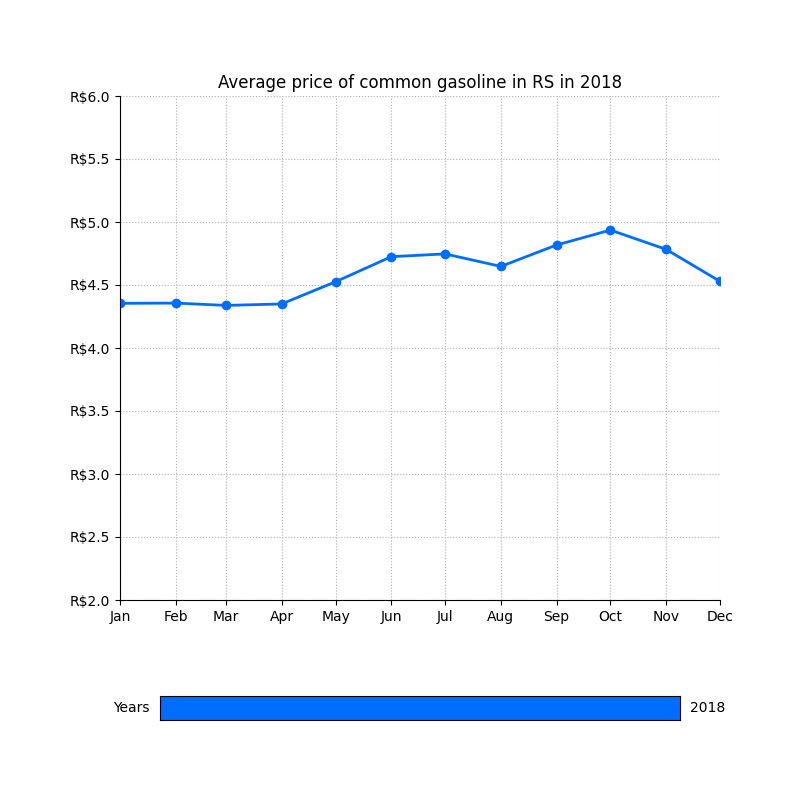

In [33]:
year = 2005

# getting date range used as parameter to the x-axis 
date_range = list(map(pd.to_datetime, np.arange('2005-01','2006-01', dtype='datetime64')))

data = gas_rs.loc[year, 'PREÇO MÉDIO REVENDA'].values
fig, ax = plt.subplots(figsize=(8,8))
plt.subplots_adjust(left=0.15, bottom=0.25) # Make space for the slider

plot,  = plt.plot(date_range, data, '-o', color='#006DFF', lw=2)
plot_settings(plt.gca())

slider_ax = plt.axes([.2, .1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(slider_ax, 'Years', valmin=2005, valmax=2018, valstep=1, valfmt='%.0f', color='#006DFF')
slider.on_changed(change_year)

plt.show()

## 5. Conclusion

If you read until here, thanks for the attention. Took me several years to build this plot, but it's worth. Follow me to see more Data Science projects.